# Estudio de Rendimiento Backend en OPAR

En este estudio de rendimiento, evaluaremos el comportamiento del backend de la aplicación OPAR en dos áreas clave: **inmuebles** y **opiniones**. El apartado de inmuebles se centra en la capacidad del sistema para gestionar y procesar eficientemente las búsquedas, filtros (por precio, barrio, tipo de inmueble) y la carga de información detallada de cada propiedad disponible para alquiler. En cuanto a opiniones, se medirá el rendimiento en la recopilación, almacenamiento y recuperación de calificaciones y comentarios de los usuarios, asegurando que el sistema pueda ofrecer resultados rápidos y precisos al momento de consultar la reputación de un inmueble. El objetivo es garantizar una experiencia de usuario ágil y confiable, con tiempos de respuesta optimizados y una gestión eficiente de los datos en ambas secciones.


### Integrantes:
- Juan Camilo Lozada Garavito – 2205560
- Daniel Camilo Barrera Pérez – 2205562
- Jerson Julian Cañon Castillo – 2205633
- Santiago González Flores - 2200165

## Versión 1
En esta primera versión del backend, se implementará una arquitectura basada en contenedores utilizando Docker. Se configurarán dos contenedores: uno para el backend, que gestionará la lógica de la aplicación y la API, y otro para la base de datos, que almacenará los datos de inmuebles y opiniones de los usuarios. El objetivo es evaluar cómo se comporta el backend al ser desplegado en este entorno de contenedores, garantizando que ambos servicios interactúen de manera eficiente y escalable. 
<div style="margin-left: 200px;">
    <img src="./Multimedia/V1.jpg" alt="Diagrama versión 1" width="500px" height="220">
</div>


## Versión 2

Desplegar con kubernetes 1 replica

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = pd.read_csv("./v2/Añadir_Inmueble/añadir_inmueble_12000_graph_result.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733085750539,734,Añadir Inmueble,200,NaN,Thread Group 1-121,text,True,NaN,695,441,613,613,http://localhost:30200/api/inmuebles/agregar,733,0,0
1,1733085750604,670,Añadir Inmueble,200,NaN,Thread Group 1-138,text,True,NaN,695,441,613,613,http://localhost:30200/api/inmuebles/agregar,670,0,0
2,1733085750579,695,Añadir Inmueble,200,NaN,Thread Group 1-142,text,True,NaN,695,441,614,614,http://localhost:30200/api/inmuebles/agregar,695,0,1
3,1733085750587,688,Añadir Inmueble,200,NaN,Thread Group 1-28,text,True,NaN,695,441,612,612,http://localhost:30200/api/inmuebles/agregar,685,0,0
4,1733085750576,699,Añadir Inmueble,200,NaN,Thread Group 1-44,text,True,NaN,695,441,611,611,http://localhost:30200/api/inmuebles/agregar,698,0,0


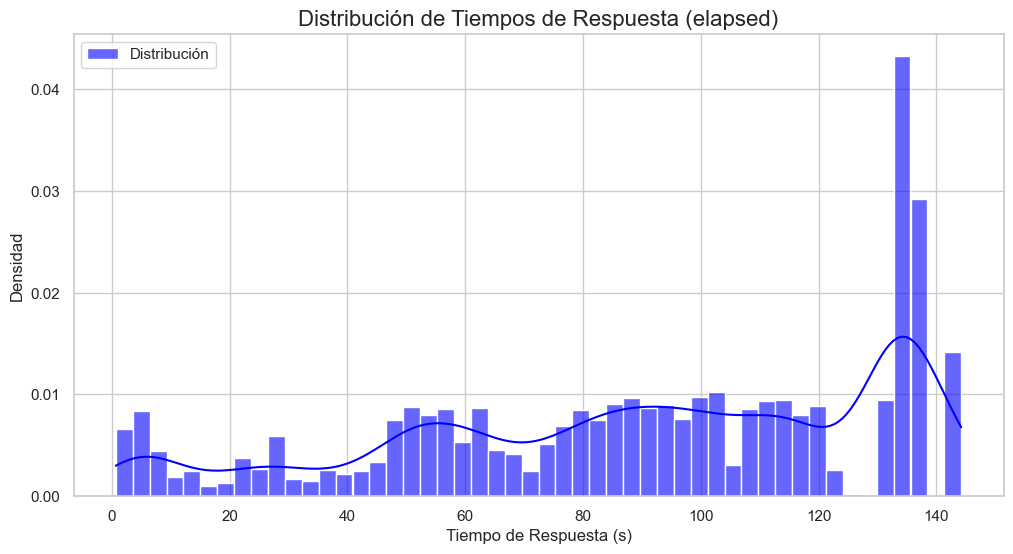

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()


## Versión 3

Desplegar con kubernetes 2 replicas

## Versión 4

Desplegar con kubernetes 4 replicas

## Versión 5

En esta quinta versión del backend, se implementará una arquitectura basada en contenedores utilizando Docker. Se configurarán cuatro contenedores: uno para el backend, que gestionará la lógica de la aplicación y la API; otro para la base de datos, que almacenará los datos de inmuebles y opiniones de los usuarios; uno más para Prometheus, que se encargará del monitoreo del rendimiento del backend; y un último contenedor para Grafana, que se utilizará para la visualización de los datos recopilados por Prometheus. El objetivo es evaluar cómo se comporta el backend al ser desplegado en este entorno de contenedores, garantizando que todos los servicios interactúen de manera eficiente, escalable y con una adecuada visualización de métricas de rendimiento.

## Versión 6

Desplegar con kubernetes 1 replica agregando monitoreo de prometheus y visualización con grafana

## Versión 7

Desplegar con kubernetes 2 replicas agregando monitoreo de prometheus y visualización con grafana

## Versión 8

Desplegar con kubernetes 4 replicas agregando monitoreo de prometheus y visualización con grafana